In [6]:
# importing all libraries
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data
df = pd.read_csv('../data/processed/churn_preprocessed.csv')

df.head()

x = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:
#Splittin Data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#load the model
xgb_model = joblib.load('../models/final_xgb_model.pkl')

In [16]:
y_prob = xgb_model.predict_proba(x_test)[:,1]

threshold = 0.6
y_pred = (y_prob >= threshold).astype('int')

In [17]:
print('Classification Report: \n',classification_report(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
print('\nAccuracy: ',accuracy_score(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       478
           1       0.77      0.65      0.71        81

    accuracy                           0.92       559
   macro avg       0.86      0.81      0.83       559
weighted avg       0.92      0.92      0.92       559

Confusion Matrix: 
 [[462  16]
 [ 28  53]]

Accuracy:  0.9212880143112702


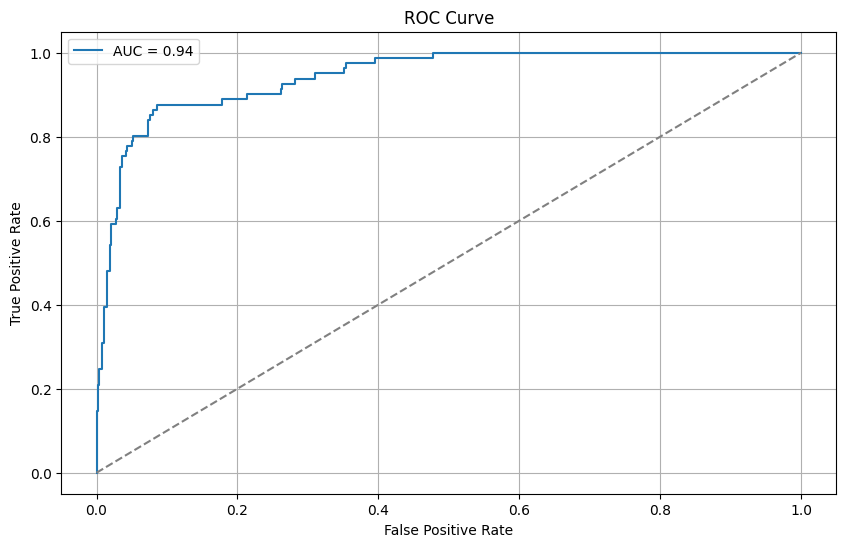

In [19]:
# ROC AUC Curve

fpr,tpr,_ = roc_curve(y_test,y_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()

plt.savefig('../plot/roc_curve.png',bbox_inches='tight')

plt.show()

In [20]:
# roc_auc_score
roc_auc = roc_auc_score(y_test,y_prob)
print('ROC AUC Score : ', roc_auc)

ROC AUC Score :  0.943488816571104


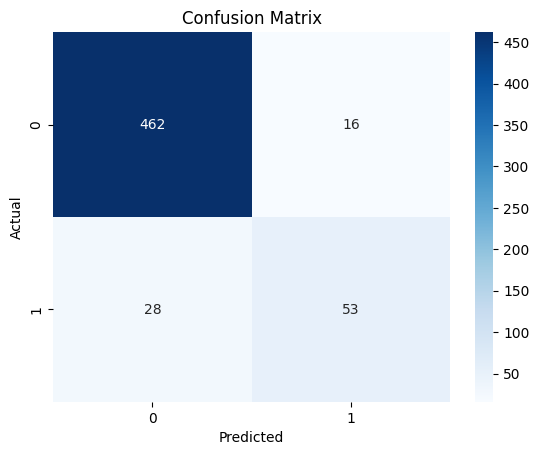

In [22]:
# Confusion Matrix

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('../plot/confusion_matrix.png', bbox_inches='tight')

plt.show()

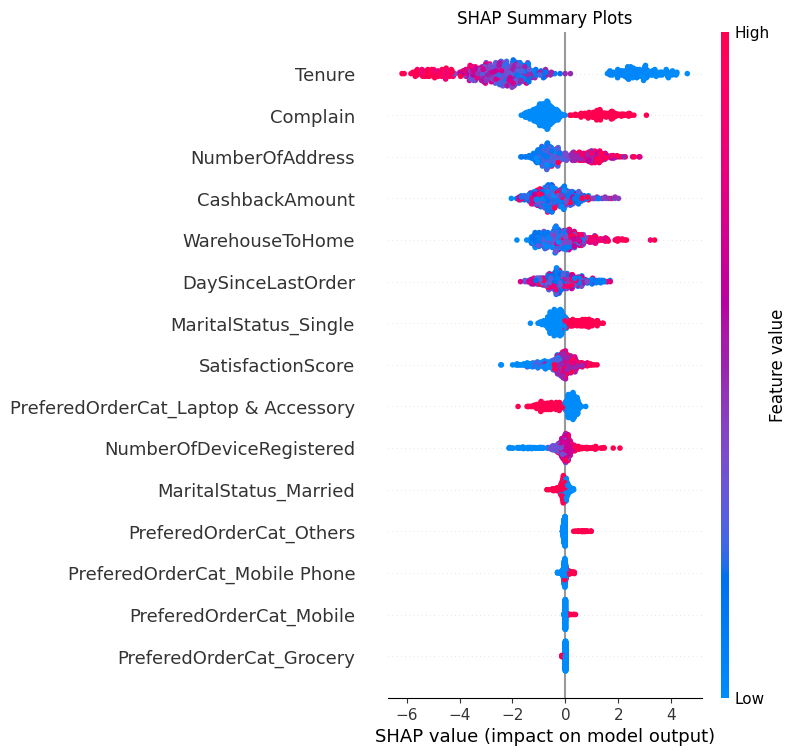

In [23]:
# shap
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,show=False)
plt.title('SHAP Summary Plots')

plt.savefig('../plot/shap_summary_plots.png',bbox_inches='tight')

plt.show()